In [2]:
%load_ext autoreload
%autoreload 2
import sys
sys.path.append("../")
import warnings
warnings.filterwarnings("ignore")

In [3]:
import pickle
import json
import numpy as np
from features import merge_entries, prepare_entry
from utills import chunker, cartesian_product
import glob
from tqdm.auto import trange, tqdm
import pickle
import av_analysis as av
import pandas as pd

In [76]:
import shap
%matplotlib inline

In [4]:
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import matplotlib.style as style
from matplotlib import rcParams
%matplotlib notebook
style.use('seaborn-whitegrid')


In [5]:
import seaborn as sns

In [93]:
analysis = av.AVAnalysis('../temp_data/pan/experiment_data.p', vector_path_prefix='../temp_data/pan/')

In [7]:
gpt3_docs = av.load_generated_docs('../temp_data/gpt3_new/new_human_gpt3_preprocessed.jsonl')

Read: 106
Avg Lengths:
Human 1:    4941.38
Human 2:    4923.18
AI 1:       4824.05
AI 2:       4758.64


In [115]:
gpt3_results = analysis.apply_model(gpt3_docs)

Human - Human:          0.811
Human - AI:             0.299
AI - AI:                0.973
AI - AI (Diff Author):  0.963


In [112]:
chatgpt_docs = av.load_generated_docs('../temp_data/chatgpt/human_chatgpt_preprocessed.jsonl')

Read: 95
Avg Lengths:
Human 1:    4973.69
Human 2:    4941.02
AI 1:       4876.98
AI 2:       4773.77


In [116]:
chatgpt_results = analysis.apply_model(chatgpt_docs)

Human - Human:          0.800
Human - AI:             0.232
AI - AI:                0.984
AI - AI (Diff Author):  0.952


In [117]:
all_docs_dict = {
    'human_1': (gpt3_docs[0], gpt3_docs[4]),
    'human_2': (gpt3_docs[1], gpt3_docs[4]),
    'chatgpt_1': (chatgpt_docs[2],chatgpt_docs[4]),
    'chatgpt_2': (chatgpt_docs[3], chatgpt_docs[4]),
    'gpt3_1': (gpt3_docs[2], gpt3_docs[4]),
    'gpt3_2': (gpt3_docs[3], gpt3_docs[4])
}

In [118]:
key_roots = ['human', 'chatgpt', 'gpt3']

In [119]:
res = analysis.apply_model_multiple_sets(all_docs_dict, key_roots)

human - human: 0.789
chatgpt - human: 0.254
chatgpt - chatgpt: 0.983
gpt3 - human: 0.342
gpt3 - chatgpt: 0.978
gpt3 - gpt3: 0.970


<IPython.core.display.Javascript object>


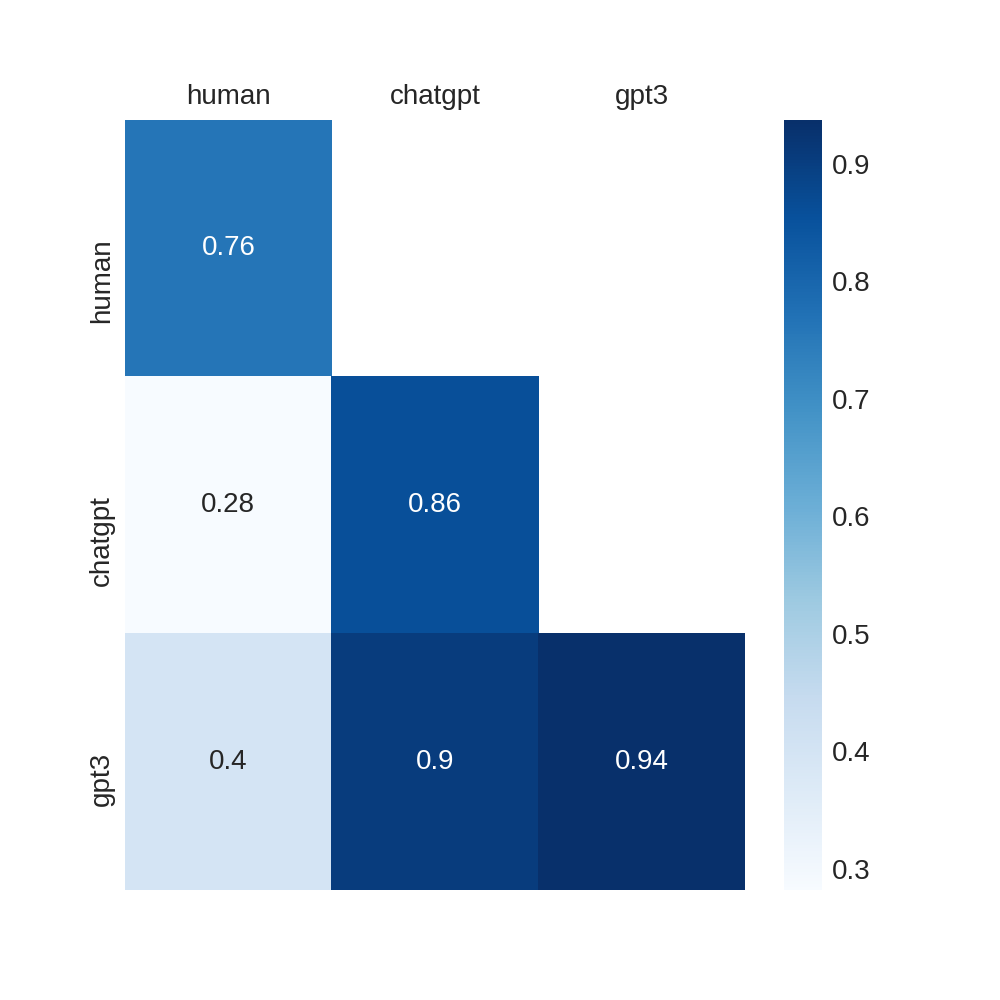

<AxesSubplot:>

In [113]:
analysis.plot_multiple_set_result(res, key_roots)

In [120]:
shap_values_gpt3 = analysis.get_all_shap_values(gpt3_docs)

In [121]:
shap_summaries_df = analysis.get_all_shap_summary(gpt3_docs, 'gpt3')

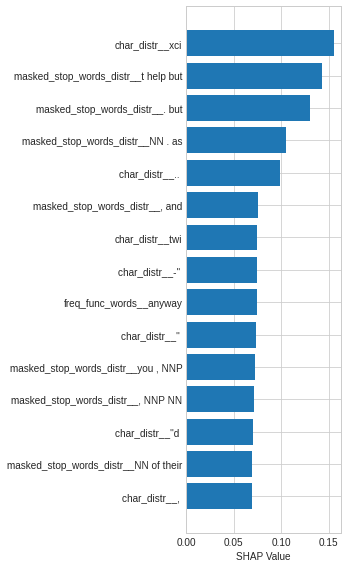

In [122]:
analysis.plot_shap_summary_single_comparison(shap_summaries_df['human-gpt3'])

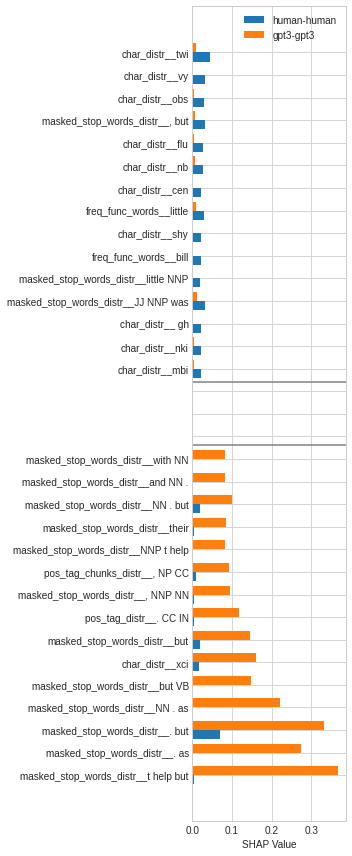

In [133]:
analysis.plot_shap_summary_two_comparisons(shap_summaries_df, 'human-human', 'gpt3-gpt3')

In [124]:
shap_summaries_chatgpt_df = analysis.get_all_shap_summary(chatgpt_docs, 'chatgpt')

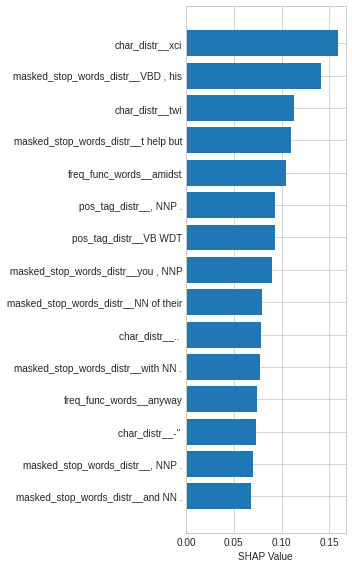

In [125]:
analysis.plot_shap_summary_single_comparison(shap_summaries_chatgpt_df['human-chatgpt'])

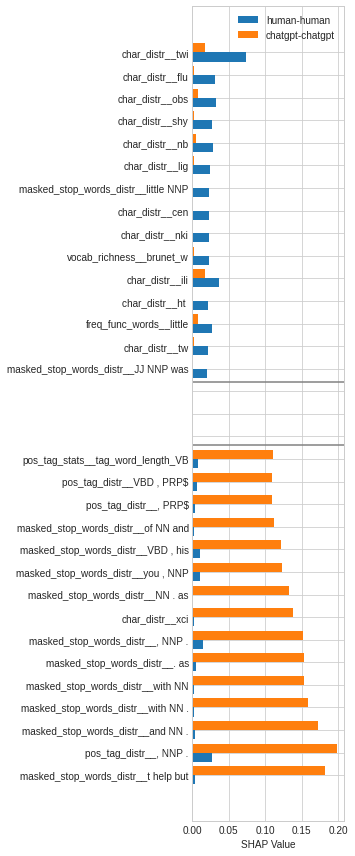

In [132]:
analysis.plot_shap_summary_two_comparisons(shap_summaries_chatgpt_df, 'human-human', 'chatgpt-chatgpt')

In [127]:
n = min(len(chatgpt_docs[2]), len(gpt3_docs[2]))
print(n)
chatgpt_gpt3_shap_values = analysis.get_shap_values(chatgpt_docs[2][:n], gpt3_docs[2][:n])

95


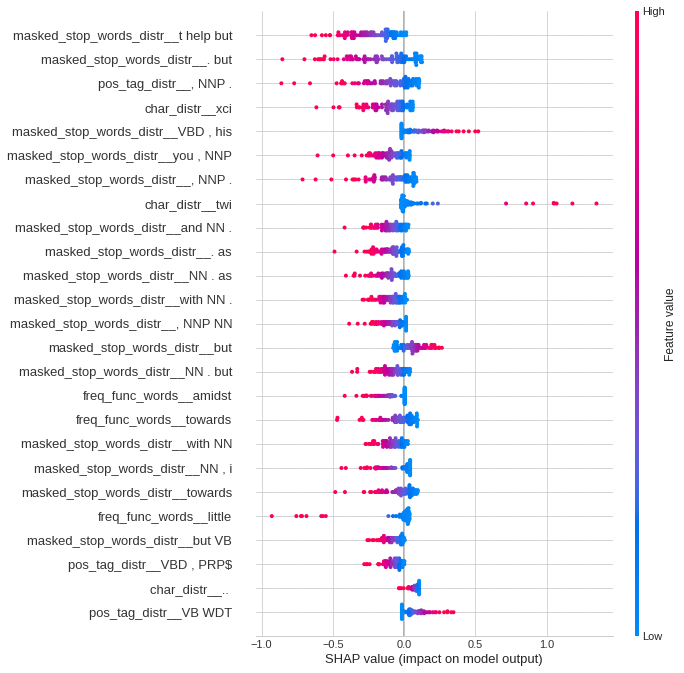

<Figure size 432x288 with 0 Axes>

In [128]:
analysis.plot_shap_summary(chatgpt_docs[2][:n], gpt3_docs[2][:n])